In [1]:
!pip install polyglot PyICU pycld2 morfessor
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 24.7 MB/s 
     |████████████████████████████████| 305 kB 46.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41.4 MB 1.3 MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52577 sha256=a44402901f2314f1f1a459211bfcc44a13c77cee343d9ac2f8035f1cbb6fee25
  Stored in directory: /root/.cache/pip/wheels/09/bc/67/75c9de8e9726460bc0b101ad225ad025cb8ce9e0759beb9d52
  Created wheel for PyICU: filename=PyICU-2.9-cp37-cp37m-linux_x86_64.whl size=1375434 sha256=3ab54837c02923be1296d24397dce14b7c284907e655b0f516b4c15cfd35806d
  Stored in directory: /root/.cache/pip/wheels/28/88/93/6c1b06361e4cbd4e7f793fb456729f69798f9aa3fc2a791cd7
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86

In [2]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, pandas as pd, re, nltk, itertools, spacy
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tree import Tree
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from polyglot.text import Text, Word
from polyglot.downloader import downloader
downloader.download("embeddings2.es")
downloader.download("ner2.es")
downloader.download("embeddings2.fr")
downloader.download("ner2.fr")
from collections import Counter, defaultdict
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.es is already up-to-date!
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...
[polyglot_data]   Package ner2.es is already up-to-date!
[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.fr is already up-to-date!
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...
[polyglot_data]   Package ner2.fr is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


# **Review of Regular Expressions**

### ***Are they bots?***

Some tweets contain user mentions. Some of these mentions follow a very strange pattern. A few examples that you notice: `@robot3!`, `@robot5&` and `@robot7#`

To these, you will do a proof of concept with one tweet and extract them using the **`re.findall()`** method.

 
* `\d`: digit
* `\w`: word character
* `\W`: non-word character
* `\s`: whitespace

The text of one tweet was saved in the variable `sentiment_analysis`. 

* Write a regex that matches the user mentions that starts with `@` and follows the pattern, e.g. `@robot3!`.

* Find all the matches of the pattern in the `sentiment_analysis` variable.

In [2]:
sentiment_analysis = '@robot9! @robot4& I have a good feeling that the show isgoing to be amazing! @robot9$ @robot7%'

print(re.findall(r"@robot\d\W", sentiment_analysis))

['@robot9!', '@robot4&', '@robot9$', '@robot7%']


### ***Find the numbers ( always specify whitespaces as `\s`)***

Some tweets contain the number of retweets, user mentions, and likes. You decide to extract this important information that is given as in this example:

```
Agh,snow! User_mentions:9, likes: 5, number of retweets: 4
```

You pull a list of metacharacters:`\d` digit,`\w` word character,`\s` whitespace.

Always indicate whitespace with metacharacters.

The variable `sentiment_analysis` containing the text of one tweet.


* Write a regex that matches the number of user mentions given as, for example, `User_mentions:9` in `sentiment_analysis`.

* Write a regex that matches the number of likes given as, for example, `likes: 5` in `sentiment_analysis`.

* Write a regex that matches the number of retweets given as, for example, `number of retweets: 4` in `sentiment_analysis`.

In [4]:
sentiment_analysis = "Unfortunately one of those moments wasn't a giant squid monster. User_mentions:2, likes: 9, number of retweets: 7"

# Write a regex to obtain user mentions
print(re.findall(r"User\Smentions\S\d", sentiment_analysis))

# Write a regex to obtain number of likes
print(re.findall(r"likes\S\s\d", sentiment_analysis))

# Write a regex to obtain number of retweets
print(re.findall(r"number\sof\sretweets\S\s\d", sentiment_analysis))

['User_mentions:2']
['likes: 9']
['number of retweets: 7']


### ***Match and split***

Some of the tweets, instead of having spaces to separate words, have strange characters.  You notice that 

* the *sentences* are always separated by a special character, followed by a number, the word `break`, and after that, another special character, e.g `&4break!`,
* the *words* are always separated by a special character, the word new, and a normal random character, e.g `#newH`.

The variable `sentiment_analysis` containing the text of one tweet

* Write a regex that matches the pattern separating the sentences in `sentiment_analysis`, e.g. `&4break!`.
* Replace `regex_sentence` with a space `" "` in the variable `sentiment_analysis`. Assign it to `sentiment_sub`.
* Write a regex that matches the pattern separating the words in `sentiment_analysis`, e.g. `#newH`.
* Replace `regex_words` with a space in the variable `sentiment_sub`. Assign it to `sentiment_final` and print out the result.

In [7]:
sentiment_analysis = 'He#newHis%newTin love with$newPscrappy. #8break%He is&newYmissing him@newLalready'
print(sentiment_analysis, '\n')

# Replace the regex_sentence with a space
sentiment_sub = re.sub(r"\W\dbreak\W", " ", sentiment_analysis)

# Replace the regex_words and print the result
sentiment_final = re.sub(r"\Wnew\w", " ", sentiment_sub)

print(sentiment_final)

He#newHis%newTin love with$newPscrappy. #8break%He is&newYmissing him@newLalready 

He is in love with scrappy.  He is missing him already


## **Repetitions**

### ***Everything clean***

There are several types of strings that increase your sentiment analysis complexity. But these strings do not provide any useful sentiment. Among them, we can have links and user mentions.

In order to clean the tweets, you want to extract some examples first. You know that 

* most of the times links start with `http` and do not contain any whitespace, e.g. `https://www.datacamp.com`. 
* User mentions start with `@` and can have letters and numbers only, e.g. `@johnsmith3`.

You write down some helpful quantifiers to help you: `*` zero or more times, `+` once or more, `?` zero or once.

The list `sentiment_analysis` containing the text of three tweets are already loaded in your session. 

* Write a regex to find all the matches of `http` links appearing in each `tweet` in `sentiment_analysis`. Print out the result.

* Write a regex to find all the matches of user mentions appearing in each `tweet` in `sentiment_analysis`. Print out the result.



In [7]:
data = ['Boredd. Colddd @blueKnight39 Internet keeps stuffing up. Save me! https://www.tellyourstory.com', 
        "I had a horrible nightmare last night @anitaLopez98 @MyredHat31 which affected my sleep, now I'm really tired",
        'im lonely  keep me company @YourBestCompany! @foxRadio https://radio.foxnews.com 22 female, new york']

sentiment_analysis = pd.Series(data=data, index=[545, 546, 547])

for tweet in sentiment_analysis:
	# Write regex to match http links and print out result
	print(re.findall(r"http.+\.com", tweet))

	# Write regex to match user mentions and print out result
	print(re.findall(r"@\w+\d?", tweet))

['https://www.tellyourstory.com']
['@blueKnight39']
[]
['@anitaLopez98', '@MyredHat31']
['https://radio.foxnews.com']
['@YourBestCompany', '@foxRadio']


`\S` is very useful to use when you know a pattern doesn't contain spaces and you have reached the end when you do find one.

### ***Some time ago***

You are interested in knowing when the tweets were posted. After reading a little bit more, you learn that dates are provided in different ways. You decide to extract the dates using **`.findall()`** so you can normalize them afterwards to make them all look the same.

You realize that the dates are always presented in one of the following ways:

`27 minutes ago`

`4 hours ago`

`23rd june 2018`

`1st september 2019 17:25`

The list `sentiment_analysis` containing the text of three tweets, as well as the `re` module are already loaded in your session. 

* Complete the for-loop with a regex that finds all dates in a format similar to `27 minutes ago` or `4 hours ago`.

* Complete the for-loop with a regex that finds all dates in a format similar to `23rd june 2018`.

* Complete the for-loop with a regex that finds all dates in a format similar to `1st september 2019 17:25`.

In [13]:
sentiment_analysis = pd.Series(data=['I would like to apologize for the repeated Video Games Live related tweets. 32 minutes ago',
                                     '@zaydia but i cant figure out how to get there / back / pay for a hotel 1st May 2019',
                                     'FML: So much for seniority, bc of technological ineptness 23rd June 2018 17:54'], index=[232, 233, 234])

# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
  	print(re.findall(r"\d{1,2}\s\w+\sago", date))


# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
	  print(re.findall(r"\d{1,2}\w*\s\w+\s\d{4}", date))
   
# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
	print(re.findall(r"\d{1,2}\w*\s\w+\s\d{4}\s\d{1,2}:\d{2}", date))
 


['32 minutes ago']
[]
[]
[]
['1st May 2019']
['23rd June 2018']
[]
[]
['23rd June 2018 17:54']


### ***Getting tokens***

Your next step is to ***tokenize*** the text of your tweets. *Tokenization is the process of breaking a string into lexical units or, in simpler terms, words*. But first, you need to remove hashtags so they do not cloud your process. You realize that hashtags start with a `#` symbol and contain letters and numbers but never whitespace. After that, you plan to split the text at whitespace matches to get the tokens.

You bring your list of quantifiers to help you: `*` zero or more times, `+` once or more, `?` zero or once, `{n, m}` minimum `n`, maximum `m`.

The variable `sentiment_analysis` containing the text of one tweet as well as the `re` module are already loaded in your session.


* Replace all the matches of the regex with an empty string `""`. Assign it to `no_hashtag` variable.

* Split the text in the `no_hashtag` variable at every match of one or more consecutive whitespace.


In [17]:
sentiment_analysis = 'ITS NOT ENOUGH TO SAY THAT IMISS U #MissYou #SoMuch #Friendship #Forever'

# Write a regex matching the hashtag pattern
regex = r"#\w+"

# Replace the regex by an empty string
no_hashtag = re.sub(r"#\w+", "", sentiment_analysis)

# Get tokens by splitting text
print(re.findall(r"\w+", no_hashtag))
print(re.split(r"\s+", no_hashtag))

['ITS', 'NOT', 'ENOUGH', 'TO', 'SAY', 'THAT', 'IMISS', 'U']
['ITS', 'NOT', 'ENOUGH', 'TO', 'SAY', 'THAT', 'IMISS', 'U', '']


## **`re.search()` and `re.match()`**

* re.search() หาทางหมด
* re.match() หาเฉพาะตอนต้นประโยค

## **Special characters**

* `.` matches *ANY* character except newline.
* `^` หาเฉพาะต้นประโยค
* `$` หาเฉพาะท้ายประโยค
* Escape special characters ใช้ `\`

## **OR operator**

* `|`

## **Set of characters**

* `[]` ทุกตัวในวงเล็บ
* `[^]` ทุกตัวที่ไม่อยู่ในวงเล็บ

### ***Finding files***

You are not satisfied with your tweets dataset cleaning. There are still extra strings that do not provide any sentiment. Among them are strings that refer to text file names.

You also find a way to detect them:

* They appear at the start of the string.
* They always start with a sequence of 2 or 3 upper or lowercase vowels (a e i o u).
* They always finish with the `txt` ending.

You are not sure if you should remove them directly. So you write a script to find and store them in a separate dataset.

You write down some metacharacters to help you: `^` anchor to beginning, `.` any character.

The variable `sentiment_analysis` containing the text of two tweets as well as the `re` module are already loaded in your session. 

* Write a regex that matches the pattern of the text file names, e.g. `aemyfile.txt`.

* Find all matches of the regex in the elements of `sentiment_analysis`. Print out the result.

* Replace all matches of the regex with an empty string `""`. Print out the result.

In [8]:
sentiment_analysis = pd.Series(data=['AIshadowhunters.txt aaaaand back to my literature review. At least i have a friendly cup of coffee to keep me company',
                                     "ouMYTAXES.txt I am worried that I won't get my $900 even though I paid tax last year"], index=[780, 781])

for text in sentiment_analysis:
    # Find all matches of the regex
    print(re.findall(r"^[aeiouAEIOU]{2,3}.+txt", text))
      
    # Replace all matches with empty string
    print(re.sub(r"^[aeiouAEIOU]{2,3}.+txt", "", text))

['AIshadowhunters.txt']
 aaaaand back to my literature review. At least i have a friendly cup of coffee to keep me company
['ouMYTAXES.txt']
 I am worried that I won't get my $900 even though I paid tax last year


### ***Give me your email***

The company puts some rules to verify that the given email address is valid:

* The first part can contain: 
   * Upper `A-Z` or lowercase letters `a-z`
   * Numbers
   * Characters: `!`, `#`, `%`, `&`, `*`, `$`, `.`
* Must have `@`
* Domain:
   * Can contain any word characters
   * But only `.com` ending is allowed

The list `emails` as well as the `re` module are loaded in your session. 

* Write a regular expression to match valid email addresses as described.
* Match the regex to the elements contained in `emails`.
* To print out the message indicating if it is a valid email or not, complete `.format()` statement.

In [9]:
emails = ['n.john.smith@gmail.com', '87victory@hotmail.com', '!#mary-=@msca.net']

for example in emails:
  	# Match the regex to the string
    if re.match(r"[A-Za-z0-9!#%&*$.]+@\w+\.com", example):
        # Complete the format method to print out the result
      	print("The email {email_example} is a valid email".format(email_example=example))
    else:
      	print("The email {email_example} is invalid".format(email_example=example))   

The email n.john.smith@gmail.com is a valid email
The email 87victory@hotmail.com is a valid email
The email !#mary-=@msca.net is invalid


Square brackets are very useful for optional characters. 

### ***Invalid password***

* It can contain lowercase `a-z` and uppercase letters `A-Z`
* It can contain numbers
* It can contain the symbols: `*#$%!&.`
* It must be at least `8` characters long but not more than `20`

The list `passwords` and the module `re` are loaded in your session. 

* Write a regular expression to check if the passwords are valid according to the description.
* Search the elements in the `passwords` list to find out if they are valid passwords.
* To print out the message indicating if it is a valid password or not, complete `.format()` statement.

In [10]:
passwords = ['Apple34!rose', 'My87hou#4$', 'abc123']

for example in passwords:
  	# Scan the strings to find a match
    if re.match(r"[a-zA-Z0-9*#$%!&.]{8,20}", example):
        # Complete the format method to print out the result
      	print("The password {pass_example} is a valid password".format(pass_example=example))
    else:
      	print("The password {pass_example} is invalid".format(pass_example=example))   

The password Apple34!rose is a valid password
The password My87hou#4$ is a valid password
The password abc123 is invalid


Notice how metacharacters help you perform complex pattern matching in a few lines of code. For that reason, Regex has many applications in Data Science, particularly in Text Mining and <ins>*Natural Language Processing*</ins>.

## **Greedy vs Non-greedy matchings**

* Greedy คือ เขียนตามปกติ
* Non-greedy คือ เขียนต่อท้าย (ต้องตามหลังพวก `+` หรือ `*`) ด้วย `?`

### ***Understanding the difference***

Remove HTML tag but keep the inside content as they are useful for analysis.

Let's take a look at this sentence containing an HTML tag:

`I want to see that <strong>amazing show</strong> again!.`

You know that to get the HTML tag you need to match anything that sits inside angle brackets `<` `>`. But the biggest problem is that the closing tag has the same structure. If you match too much, you will end up removing key information. So you need to decide whether to use a greedy or a lazy quantifier.

The string is already loaded as `string` to your session.


* Write a regex expression to replace HTML tags with an empty string.
* Print out the result.


In [13]:
string = 'I want to see that <strong>amazing show</strong> again!'

string_notags = re.sub(r"<\w+>|</\w+>", "", string)
print(string_notags)

string_notags = re.sub(r"<.+?>", "", string)
print(string_notags)

string_tags x= re.sub(r"<.+>", "", string)
print(string_tags)

I want to see that amazing show again!
I want to see that amazing show again!
I want to see that  again!


Remember that a greedy quantifier will try to match as much as possible while a non-greedy quantifier will do it as few times as needed, expanding one character at a time and giving us the match we are looking for.

### ***Greedy matching***

Next, you see that numbers still appear in the text of the tweets. So, you decide to find all of them.

Let's imagine that you want to extract the number contained in the sentence `I was born on April 24th`. A lazy quantifier will make the regex return `2` and `4`, because they will match as few characters as needed. However, a greedy quantifier will return the entire `24` due to its need to match as much as possible.

The `re` module as well as the variable `sentiment_analysis` are already loaded in your session. 

* Use a lazy quantifier to match all numbers that appear in the variable `sentiment_analysis`.

* Now, use a greedy quantifier to match all numbers that appear in the variable `sentiment_analysis`.

In [14]:
sentiment_analysis = 'Was intending to finish editing my 536-page novel manuscript tonight, but that will probably not happen. And only 12 pages are left '

# Write a lazy regex expression 
numbers_found_lazy = re.findall(r"\d+?", sentiment_analysis)

# Print out the result
print(numbers_found_lazy)

# Write a greedy regex expression 
numbers_found_greedy = re.findall(r"\d+", sentiment_analysis)

# Print out the result
print(numbers_found_greedy)

['5', '3', '6', '1', '2']
['536', '12']


Even though greedy quantifiers lead to longer matches, they are sometimes the best option. Because lazy quantifiers match as few as possible, they return a shorter match than we expected.

### ***Lazy approach***

You have done some cleaning in your dataset but you are worried that there are sentences encased in parentheses that may cloud your analysis.

Again, a greedy or a lazy quantifier may lead to different results.

For example, if you want to extract a word starting with `a` and ending with `e` in the string `I like apple pie`, you may think that applying the greedy regex `r"a.+e"` will return `apple`. However, your match will be `apple pie`. A way to overcome this is to make it lazy by using `?` which will return `apple`.

The `re` module and the variable `sentiment_analysis` are already loaded in your session.

* Use a greedy quantifier to match text that appears within parentheses in the variable `sentiment_analysis`.

* Now, use a lazy quantifier to match text that appears within parentheses in the variable `sentiment_analysis`.

In [15]:
sentiment_analysis = "Put vacation photos online (They were so cute) a few yrs ago. PC crashed, and now I forget the name of the site (I'm crying). "

# Write a greedy regex expression to match 
sentences_found_greedy = re.findall(r"\(.+\)", sentiment_analysis)

# Print out the result
print(sentences_found_greedy)

# Write a lazy regex expression
sentences_found_lazy = re.findall(r"\(.+?\)", sentiment_analysis)

# Print out the results
print(sentences_found_lazy)

["(They were so cute) a few yrs ago. PC crashed, and now I forget the name of the site (I'm crying)"]
['(They were so cute)', "(I'm crying)"]


Notice that using greedy quantifiers always leads to longer matches that sometimes are not desired. Making quantifiers lazy by adding `?` to match a shorter pattern is a very important consideration to keep in mind when handling data for text mining. 

## **Capturing groups**

Capture a repeated group, e.g., `(\d+)`

In [17]:
print(re.findall(r"(\d+)", 'My lucky numbers are 8755 and 33'))

['8755', '33']


Repeat a capturing group, e.g., `(\d)+`

In [18]:
print(re.findall(r"(\d)+", 'My lucky numbers are 8755 and 33'))

['5', '3']


### ***Try another name***

There are email addresses inserted in some tweets. Now, you are curious to find out which is the most common name.

You want to extract the first part of the email. E.g. if you have the email `marysmith90@gmail.com`, you are only interested in `marysmith90`.
You need to match the entire expression. So you make sure to extract only names present in emails. Also, you are only interested in names containing upper (e.g. A,B, Z) or lowercase letters (e.g. a, d, z) and numbers.

The list `sentiment_analysis` containing the text of three tweets as well as the `re` module were loaded in your session. 

* Complete the regex to match the email capturing only the name part. The name part appears before the `@`.

* Find all matches of the regex in each element of `sentiment_analysis` analysis. Assign it to the variable `email_matched`.

* Complete the `.format()` method to print the results captured in each element of `sentiment_analysis`.

In [22]:
sentiment_analysis = ['Just got ur newsletter, those fares really are unbelievable. Write to statravelAU@gmail.com or statravelpo@hotmail.com. They have amazing prices', 'I should have paid more attention when we covered photoshop in my webpage design class in undergrad. Contact me Hollywoodheat34@msn.net.', 'hey missed ya at the meeting. Read your email! msdrama098@hotmail.com']

for tweet in sentiment_analysis:
    # Find all matches of regex in each tweet
    email_matched = re.findall(r"([A-Za-z0-9]+)@", tweet)

    # Complete the format method to print the results
    print("Lists of users found in this tweet: {}".format(email_matched))

Lists of users found in this tweet: ['statravelAU', 'statravelpo']
Lists of users found in this tweet: ['Hollywoodheat34']
Lists of users found in this tweet: ['msdrama098']


### ***Flying home***

You are given a dataset with only the email subjects for each of the people traveling. You learn that the text followed a pattern. Here is an example:

`Here you have your boarding pass LA4214 AER-CDB 06NOV.`

You need to extract the information about the flight:

* The two letters indicate the airline (e.g `LA`),
* The 4 numbers are the flight number (e.g. `4214`).
* The three letters correspond to the departure (e.g `AER`),
* The destination (`CDB`),
* The date (`06NOV`) of the flight.

All letters are always uppercase.

The variable `flight` containing one email subject was loaded in your session. 

* Find all the matches corresponding to each piece of information about the flight. Assign it to `flight_matches`.

In [23]:
flight = 'Subject: You are now ready to fly. Here you have your boarding pass IB3723 AMS-MAD 06OCT'

# Find all matches of the flight information
flight_matches = re.findall(r"([A-Z]{2})(\d{4})\s([A-Z]{3})-([A-Z]{3})\s(\d{2}[A-Z]{3})", flight)
    
#Print the matches
print("Airline: {} Flight number: {}".format(flight_matches[0][0], flight_matches[0][1]))
print("Departure: {} Destination: {}".format(flight_matches[0][2], flight_matches[0][3]))
print("Date: {}".format(flight_matches[0][4]))

Airline: IB Flight number: 3723
Departure: AMS Destination: MAD
Date: 06OCT


**`findall()`** returns a list of tuples. The n*th* element of each tuple is the element corresponding to group `n`. This provides us with an easy way to access and organize our data.

## **Alternation**

Use groups to choose between optional patterns

In [25]:
print(re.findall(r"\d+\s(cat|dog|bird)", "I want to have a pet. But I don't know if I want 2 cats, 1 dog or a bird."))
print(re.findall(r"(\d+)\s(cat|dog|bird)", "I want to have a pet. But I don't know if I want 2 cats, 1 dog or a bird."))

['cat', 'dog']
[('2', 'cat'), ('1', 'dog')]


## **Non-capturing groups**

Match but not capture a group

* `(?:regex)`

In [27]:
print(re.findall(r"(?:\d+)\s(cat|dog|bird)", "I want to have a pet. But I don't know if I want 2 cats, 1 dog or a bird."))
print(re.findall(r"(\d+)\s(?:cat|dog|bird)", "I want to have a pet. But I don't know if I want 2 cats, 1 dog or a bird."))

['cat', 'dog']
['2', '1']


### ***Love it!***

You want to identify positive tweets about movies and concerts.

You plan to find all the sentences that contain the words `love`, `like`, or `enjoy` and capture that word. You will limit the tweets by focusing on those that contain the words `movie` or `concert` by keeping the word in another group. You will also save the movie or concert name.

For example, if you have the sentence: `I love the movie Avengers.` You match and capture `love`. You need to match and capture `movie`. Afterwards, you match and capture anything until the dot.

The list `sentiment_analysis` containing the text of three tweets and the `re` module are loaded in your session. 

* Complete the regular expression to capture the words `love` or `like` or `enjoy`. Match and capture the words `movie` or `concert`. Match and capture anything appearing until the `.`.

* Find all matches of the regex in each element of `sentiment_analysis`. Assign them to `positive_matches`.

* Complete the `.format()` method to print out the results contained in `positive_matches` for each element in `sentiment_analysis`.

In [28]:
sentiment_analysis = ['I totally love the concert The Book of Souls World Tour. It kinda amazing!',
                      'I enjoy the movie Wreck-It Ralph. I watched with my boyfriend.',
                      "I still like the movie Wish Upon a Star. Too bad Disney doesn't show it anymore."]

for tweet in sentiment_analysis:
	# Find all matches of regex in tweet
    positive_matches = re.findall(r"(love|like|enjoy).+?(movie|concert)\s(.+?)\.", tweet)
    
    # Complete format to print out the results
    print("Positive comments found {}".format(positive_matches))

Positive comments found [('love', 'concert', 'The Book of Souls World Tour')]
Positive comments found [('enjoy', 'movie', 'Wreck-It Ralph')]
Positive comments found [('like', 'movie', 'Wish Upon a Star')]


### ***Ugh! Not for me!***

After finding positive tweets, you want to do it for negative tweets. Your plan now is to find sentences that contain the words `hate`, `dislike` or `disapprove`. You will again save the `movie` or `concert` name. You will get the tweet containing the words `movie` or `concert` but this time, you don't plan to save the word.

For example, if you have the sentence: `I dislike the movie Avengers a lot.`. You match and capture `dislike`. You will match but not capture the word `movie`. Afterwards, you match and capture anything until the dot.

The list `sentiment_analysis` containing the text of three tweets as well as the `re` module are loaded in your session. 

* Complete the regular expression to capture the words `hate` or `dislike` or `disapprove`. Match but don't capture the words `movie` or `concert`. Match and capture anything appearing until the `.`.

* Find all matches of the regex in each element of `sentiment_analysis`. Assign them to `negative_matches`.

* Complete the `.format()` method to print out the results contained in `negative_matches` for each element in `sentiment_analysis`.

In [29]:
sentiment_analysis = ['That was horrible! I really dislike the movie The cabin and the ant. So boring.',
                      "I disapprove the movie Honest with you. It's full of cliches.",
                      'I dislike very much the concert After twelve Tour. The sound was horrible.']

for tweet in sentiment_analysis:
	# Find all matches of regex in tweet
    negative_matches = re.findall(r"(hate|dislike|disapprove).+?(?:movie|concert)\s(.+?)\.", tweet)
    
    # Complete format to print out the results
    print("Negative comments found {}".format(negative_matches))

Negative comments found [('dislike', 'The cabin and the ant')]
Negative comments found [('disapprove', 'Honest with you')]
Negative comments found [('dislike', 'After twelve Tour')]


## **Backreferences**

### ***Parsing PDF files***

You now need to work on another small project you have been delaying. Your company gave you some PDF files of signed contracts. The goal of the project is to create a database with the information you parse from them. Three of these columns should correspond to the day, month, and year when the contract was signed.
The dates appear as `Signed on 05/24/2016` (`05` indicating the month, `24` the day). You decide to use capturing groups to extract this information. Also, you would like to retrieve that information so you can store it separately in different variables.

You decide to do a proof of concept.

The variable `contract` containing the text of one contract and the `re` module are already loaded in your session.

* Write a regex that captures the month, day, and year in which the `contract` was signed. Scan `contract` for matches.
* Assign each captured group to the corresponding keys in the dictionary.
* Complete the positional method to print out the captured groups. Use the values corresponding to each key in the dictionary.

In [30]:
contract = 'Provider will invoice Client for Services performed within 30 days of performance.  Client will pay Provider as set forth in each Statement of Work within 30 days of receipt and acceptance of such invoice. It is understood that payments to Provider for services rendered shall be made in full as agreed, without any deductions for taxes of any kind whatsoever, in conformity with Provider’s status as an independent contractor. Signed on 03/25/2001.'
dates = re.search(r"Signed\son\s(\d{2})/(\d{2})/(\d{4})", contract)

# Assign to each key the corresponding match
signature = {"day": dates.group(2),
             "month": dates.group(1),
             "year": dates.group(3)}
             
# Complete the format method to print-out
print("Our first contract is dated back to {data[year]}. Particularly, the day {data[day]} of the month {data[month]}.".format(data=signature))

Our first contract is dated back to 2001. Particularly, the day 25 of the month 03.


Only if you use **`.search()`** and **`.match()`**, can you use **`.group()`** to retrieve the groups.

### ***Close the tag, please!***

You need to write a short script for checking that every HTML tag that is open has its proper closure.

You have an example of a string containing HTML tags:

`<title>The Data Science Company</title>`

You learn that an opening HTML tag is always at the beginning of the string. It appears inside `<>`. A closing tag also appears inside `<>`, but it is preceded by `/`.

You also remember that capturing groups can be referenced using numbers, e.g `\4`.

The list `html_tags`, containing three strings with HTML tags, and the `re` module are loaded in your session. 

* Complete the regex in order to match closed HTML tags. Find if there is a match in each string of the list `html_tags`. Assign the result to `match_tag`.

* If a match is found, print the first group captured and saved in `match_tag`.

* If no match is found, complete the regex to match only the text inside the HTML tag. Assign it to `notmatch_tag`.

* Print the first group captured by the regex and save it in `notmatch_tag`.

In [31]:
html_tags = ['<body>Welcome to our course! It would be an awesome experience</body>',
             '<article>To be a data scientist, you need to have knowledge in statistics and mathematics</article>',
             '<nav>About me Links Contact me!']

for string in html_tags:
    # Complete the regex and find if it matches a closed HTML tags
    match_tag =  re.match(r"<(\w+)>.*?</\1>", string)
 
    if match_tag:
        # If it matches print the first group capture
        print("Your tag {} is closed".format(match_tag.group(1))) 
    else:
        # If it doesn't match capture only the tag 
        notmatch_tag = re.match(r"<(\w+)>", string)
        # Print the first group capture
        print("Close your {} tag!".format(notmatch_tag.group(1)))

Your tag body is closed
Your tag article is closed
Close your nav tag!


### ***Reeepeated characters***

Back to your sentiment analysis! Your next task is to replace elongated words that appear in the tweets. We define an elongated word as a word that contains a repeating character twice or more times. e.g. `"Awesoooome"`.

Replacing those words is very important since a classifier will treat them as a different term from the source words lowering their frequency.

To find them, you will use capturing groups and reference them back using numbers. E.g `\4`.

If you want to find a match for `Awesoooome`, you first need to capture `Awes`. Then, match `o` and reference the same character back, and then, `me`.

The list `sentiment_analysis`, containing the text of three tweets, and the `re` module are loaded in your session. 

* Complete the regular expression to match an elongated word as described.

* Search the elements in `sentiment_analysis` list to find out if they contain elongated words. Assign the result to `match_elongated`.

* Assign the captured group number zero to the variable `elongated_word`.

* Print the result contained in the variable `elongated_word`.

In [34]:
sentiment_analysis = ['@marykatherine_q i know! I heard it this morning and wondered the same thing. Moscooooooow is so behind the times',
                      'Staying at a friends house...neighborrrrrrrs are so loud-having a party',
                      'Just woke up an already have read some e-mail']
              
for tweet in sentiment_analysis:
    # Find if there is a match in each tweet 
    match_elongated = re.search(r"\w+(\w)\1\w*", tweet)
      
    if match_elongated:
        # Assign the captured group zero 
        elongated_word = match_elongated.group(0)
            
        # Complete the format method to print the word
        print("Elongated word found: {word}".format(word=elongated_word))
    else:
        print("No elongated word found") 

Elongated word found: Moscooooooow
Elongated word found: neighborrrrrrrs
No elongated word found


You should remember that the group zero stands for the entire expression matched. It's always helpful to keep that in mind.

## **Look ahead**

* ## **Look positive `?=` and negative `?!`**

In [5]:
print(re.findall(r"\w+\.txt ", "tweets.txt transferred, mypass.txt transferred, keywords.txt error"))

# เอาเฉพาะตัวที่ตามด้วยคำว่า transferred (Look positive)
print(re.findall(r"\w+\.txt(?=\stransferred) ", "tweets.txt transferred, mypass.txt transferred, keywords.txt error"))

# เอาเฉพาะตัวที่  "ไม่ได้"  ตามด้วยคำว่า transferred (Look negative)
print(re.findall(r"\w+\.txt(?!\stransferred) ", "tweets.txt transferred, mypass.txt transferred, keywords.txt error"))

['tweets.txt ', 'mypass.txt ', 'keywords.txt ']
['tweets.txt ', 'mypass.txt ']
['keywords.txt ']


## **Look-behind**

* positive `?<=`
* negative `?<!`

In [37]:
print(re.findall(r"(?<=Member:\s)\w+\s\w+", "Member: Angus Young, Member: Chris Slade, Past: Malcolm Young, Past: Cliff Williams."))
print(re.findall(r"(?<=white\s)(cat|dog)", "My white cat sat at the table. However, my brown dog was lying on the couch."))
print(re.findall(r"(?<!white\s)(cat|dog)", "My white cat sat at the table. However, my brown dog was lying on the couch."))

['Angus Young', 'Chris Slade']
['cat']
['dog']


### ***Surrounding words***

Now, you want to perform some visualizations with your `sentiment_analysis` dataset. You are interested in the words surrounding python. You want to count how many times a specific words appears right before and after it.

***Positive lookahead*** `(?=)` makes sure that first part of the expression is followed by the lookahead expression. ***Positive lookbehind*** `(?<=)` returns all matches that are preceded by the specified pattern.

The variable `sentiment_analysis`, containing the text of one tweet, and the `re` module are loaded in your session. 


* Get all the words that are followed by the word `python` in `sentiment_analysis`. Print out the word found.

* Get all the words that are preceded by the word `python` or `Python` in `sentiment_analysis`. Print out the words found.

In [39]:
sentiment_analysis = 'You need excellent python skills to be a data scientist. Must be! Excellent python'

# Positive lookahead
look_ahead = re.findall(r"\w+\s(?=python)", sentiment_analysis)

# Print out
print(look_ahead)

# Positive lookahead
look_ahead = re.findall(r"\w+(?=\spython)", sentiment_analysis)

# Print out
print(look_ahead)

# Positive lookbehind
look_behind = re.findall(r"(?<=Python\s|python\s)\w+", sentiment_analysis)

# Print out
print(look_behind)

# Positive lookbehind
look_behind = re.findall(r"(?<=[Pp]ython\s)\w+", sentiment_analysis)

# Print out
print(look_behind)

['excellent ', 'Excellent ']
['excellent', 'Excellent']
['skills']
['skills']


It is important to know that positive lookahead will return the text matched by the first part of the expression after asserting that it is followed by the lookahead expression while positive lookbehind will return all matches that follow a specific pattern. 

### ***Filtering phone numbers***

Now, you need to write a script for a cell-phone searcher. It should scan a list of phone numbers and return those that meet certain characteristics.

The phone numbers in the list have the structure:

* Optional area code: 3 numbers
* Prefix: 4 numbers
* Line number: 6 numbers
* Optional extension: 2 numbers

E.g. `654-8764-439434-01`.

You decide to use `.findall()` and the non-capturing group's negative lookahead `(?!)` and negative lookbehind `(?<!)`.

The list `cellphones`, containing three phone numbers, and the `re` module are loaded in your session. 

* Get all cell phones numbers that are not preceded by the optional area code.
* Get all the cell phones numbers that are not followed by the optional extension.

In [40]:
cellphones = ['4564-646464-01', '345-5785-544245', '6476-579052-01']

for phone in cellphones:
    # Get all phone numbers not preceded by area code
    number = re.findall(r"(?<!\d{3}-)\d{4}-\d{6}-\d{2}", phone)
    print(number)

for phone in cellphones:
    # Get all phone numbers not followed by optional extension
    number = re.findall(r"\d{3}-\d{4}-\d{6}(?!-\d{2})", phone)
    print(number)

['4564-646464-01']
[]
['6476-579052-01']
[]
['345-5785-544245']
[]


Negative lookarounds work in a similar way to positive lookarounds. They are very helpful when we are looking to exclude certain patterns from our analysis.

# **Intoduction to Regex**

## ***Practicing regular expressions: `re.split()` and `re.findall()`***

Now you'll get a chance to write some regular expressions to match digits, strings and non-alphanumeric characters. Take a look at `my_string` first by printing it in the IPython Shell, to determine how you might best match the different steps.

Note: It's important to prefix your regex patterns with `r` to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, `"\n"` in Python is used to indicate a new line, but if you use the `r` prefix, it will be interpreted as the raw string `"\n"` - that is, the character `"\"` followed by the character `"n"` - and not as a new line.

The regular expression module `re` has already been imported for you.

*Remember that the syntax for the regex library is to always to pass the pattern first, and then the string second.*

* Split `my_string` on each sentence ending. To do this:

   * Write a pattern called `sentence_endings` to match sentence endings (`.?!`).
   * Use `re.split()` to split `my_string` on the pattern and print the result.

* Find and print all capitalized words in `my_string` by writing a pattern called `capitalized_words` and using `re.findall()`.

   * Remember the `[a-z]` pattern shown in the video to match lowercase groups? Modify that pattern appropriately in order to match uppercase groups.

* Write a pattern called spaces to match one or more spaces (`"\s+"`) and then use `re.split()` to split my_string on this pattern, keeping all punctuation intact. Print the result.

* Find all digits in `my_string` by writing a pattern called digits (`"\d+"`) and using `re.findall()`. Print the result.

In [3]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

print(re.split(r"[.?!]", my_string))

print(re.findall(r"[A-Z]\w+", my_string))

print(re.split(r'\s+', my_string))

print(re.findall(r'\d+', my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


# **Introduction to Tokenization**

## ***Word tokenization with NLTK***

Here, you'll be using the first scene of Monty Python's Holy Grail, which has been pre-loaded as `scene_one`. 

Your job in this exercise is to utilize **`word_tokenize`** and **`sent_tokenize`** from **`nltk.tokenize`** to tokenize both words and sentences from Python strings - in this case, the first scene of Monty Python's Holy Grail.


* Tokenize all the sentences in `scene_one` using the `sent_tokenize()` function.

* Tokenize the fourth sentence in `sentences`, which you can access as `sentences[3]`, using the `word_tokenize()` function.

* Find the unique tokens in the entire scene by using `word_tokenize()` on `scene_one` and then converting it into a set using `set()`.

* Print the unique tokens found. 



In [7]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'But', 'swallow', 'found', 'a', 'simple', 'south', 'That', 'husk', 'house', 'coconuts', '#', 'Yes', 'In', 'wings', 'speak', 'them', 'course', 'SCENE', 'that', 'is', 'together', 'length', 'five', 'wants', 'maybe', 'or', 'lord', 'clop', 'creeper', 'you', 'suggesting', 'mean', 'just', 'join', 'Britons', "'d", 'may', ':', 'sovereign', 'its', 'ask', 'must', 'anyway', 'Mercea', 'with', 'pound', 'in', 'non-migratory', 'held', 'our', 'feathers', 'Ridden', 'carrying', 'King', 'temperate', 'needs', 'and', '2', 'Supposing', 'under', 'England', 'they', 'get', 'here', 'strangers', 'your', 'be', 'European', 'one', 'then', 'seek', 'Saxons', 'I', 'winter', 'zone', 'to', "n't", 'why', 'but', 'minute', 'my', "'ve", 'go', 'since', 'climes', 'have', 'me', 'tell', 'kingdom', 'ounce', 'We', 'of', 'are', 'No', 'matter', 'dorsal', 'it', 'there', 'he', 'at', 'land', 'weight', 'It', 'warmer', 'covered', 'martin', 'Pull', 'trusty', 'fly', 'bring', 'got', 'not', 'bangin', 'other', 'every', 'all', 'yet', 'Am', 'A

Tokenization is fundamental to NLP, and you'll end up using it a lot in text mining and information retrieval projects.

## ***More regex with `re.search()`***

In this exercise, you'll utilize `re.search()` and `re.match()` to find specific tokens. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You'll apply these regex library methods to the same Monty Python text from the nltk corpora.

You have both `scene_one` and `sentences` available from the last exercise; now you can use them with `re.search()` and `re.match()` to extract and match more text.

* Use `re.search()` to search for the first occurrence of the word `"coconuts"` in `scene_one`. Store the result in `match`.

* Print the start and end indexes of match using its **`.start()`** and **`.end()`** methods, respectively.

* Write a regular expression called `pattern1` to find anything in square brackets.

* Use **`re.search()`** with the pattern to find the first text in `scene_one` in square brackets in the scene. Print the result.

* Create a pattern to match the script notation (e.g. `Character:`), assigning the result to `pattern2`. Remember that you will want to match any words or spaces that precede the `:` (such as the space within `SOLDIER #1:`).

* Use `re.match()` with your new pattern to find and print the script notation in the fourth line. The tokenized sentences are available in your namespace as `sentences`.

In [9]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[A-Za-z]+:"
print(re.match(pattern2, sentences[3]))

580 588
<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>
<re.Match object; span=(0, 7), match='ARTHUR:'>


# **Advanced tokenization with NLTK and regex**

## ***Choosing a tokenizer***

Given the following string, which of the below patterns is the best tokenizer? If possible, you want to retain sentence punctuation as separate tokens, but have `'#1'` remain a single token.

```
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
```

The string is available in your workspace as `my_string`

Additionally, **`regexp_tokenize`** has been imported from `nltk.tokenize`. You can use **`regexp_tokenize(string, pattern)`** with `my_string`.



In [14]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

print(regexp_tokenize(my_string, r"(\w+|#\d|\?|!)"))
print(re.findall(r"(\w+|#\d|\?|!)", my_string))

['SOLDIER', '#1', 'Found', 'them', '?', 'In', 'Mercea', '?', 'The', 'coconut', 's', 'tropical', '!']
['SOLDIER', '#1', 'Found', 'them', '?', 'In', 'Mercea', '?', 'The', 'coconut', 's', 'tropical', '!']


## ***Regex with NLTK tokenization***

Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using `nltk` and `regex`. The **`nltk.tokenize.TweetTokenizer`** class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both **`TweetTokenizer`** and **`regexp_tokenize`** from the `nltk.tokenize` module. These example tweets have been pre-loaded into the variable `tweets`.

*Unlike the syntax for the regex library, with `nltk_tokenize()` you pass the pattern as the second argument.*

* Call `regexp_tokenize()` with this regex pattern on the **first tweet** in `tweets` and assign the result to `hashtags`.

* Print `hashtags`.




In [16]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

from nltk.tokenize import regexp_tokenize, TweetTokenizer

hashtags = regexp_tokenize(tweets[0], r"#\w+")
print(hashtags)

['#nlp', '#python']


* Write a new pattern to match mentions and hashtags. A mention is something like `@DataCamp`.

Then, call **`regexp_tokenize()`** with your new hashtag pattern on the *last* tweet in tweets and assign the result to `mentions_hashtags`.

   * You can access the last element of a list using `-1` as the index, for example, `tweets[-1]`.

Print `mentions_hashtags`.

In [17]:
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], r"([#@]\w+)")
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


* Create an instance of **`TweetTokenizer`** called `tknzr` and use it inside a list comprehension to tokenize each tweet into a new list called `all_tokens`.

   * To do this, use the `.tokenize()` method of `tknzr`, with `t` as your iterator variable.

* Print `all_tokens`.

In [18]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


## ***Non-ascii tokenization***

In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!

Here, you have access to a string called `german_text`, which has been printed for you in the Shell. Notice the emoji and the German characters!

The following modules have been pre-imported from `nltk.tokenize`: **`regexp_tokenize`** and **`word_tokenize`**.

Unicode ranges for emoji are:

`('\U0001F300'-'\U0001F5FF')`, 
`('\U0001F600-\U0001F64F')`, 
`('\U0001F680-\U0001F6FF')`, and 
`('\u2600'-\u26FF-\u2700-\u27BF')`.

* Tokenize all the words in `german_text` using `word_tokenize()`, and print the result.

* Tokenize only the capital words in `german_text`.

   * First, write a pattern called `capital_words` to match only capital words. Make sure to check for the German `Ü`! To use this character in the exercise, copy and paste it from these instructions.
   * Then, tokenize it using **`regexp_tokenize()`**.

* Tokenize only the emoji in `german_text`. Use **`regexp_tokenize()`** to tokenize the emoji.

In [20]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
print(regexp_tokenize(german_text, r"[A-ZÜ]\w+"))

# Tokenize and print only emoji
print(regexp_tokenize(german_text, "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


# **Charting word length with NLTK**

## ***Charting practice***

Try using your new skills to find and chart the number of words per line in the script using `matplotlib`. The Holy Grail script is loaded for you, and you need to use regex to find the words per line.

Using list comprehensions here will speed up your computations. For example: `my_lines = [tokenize(l) for l in lines]` will call a function tokenize on each line in the list lines. The new transformed list will be saved in the `my_lines` variable.

You have access to the entire script in the variable `holy_grail`. Go for it!

* Split the script `holy_grail` into lines using the newline (`'\n'`) character.

* Use `re.sub()` inside a list comprehension to replace the prompts such as `ARTHUR:` and `SOLDIER #1`.

* Use a list comprehension to tokenize `lines` with `regexp_tokenize()`, keeping **only words**. Recall that the pattern for words is `"\w+"`.

* Use a list comprehension to create a list of line lengths called `line_num_words`.

   * Use `t_line` as your iterator variable to iterate over `tokenized_lines`, and then `len()` function to compute line lengths.

* Plot a histogram of `line_num_words` using `plt.hist()`. Don't forgot to use `plt.show()` as well to display the plot.

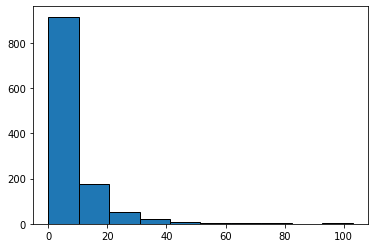

In [31]:
with open('grail.txt') as h:
    holy_grail = h.read()

    # Split the script into lines: lines
    lines = holy_grail.split('\n')

    # Replace all script lines for speaker
    lines = [re.sub(r"[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:", '', l) for l in lines]

    # Tokenize each line: tokenized_lines
    tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

    # Make a frequency list of lengths: line_num_words
    line_num_words = [len(t_line) for t_line in tokenized_lines]

    # Plot a histogram of the line lengths
    plt.hist(line_num_words, edgecolor='k')
    plt.show()

# **Word counts with bag-of-words**

## ***Building a Counter with bag-of-words***

In this exercise, you'll build your first (in this course) bag-of-words counter using a Wikipedia article, which has been pre-loaded as `article`. Try doing the bag-of-words without looking at the full article text, and guessing what the topic is! If you'd like to peek at the title at the end, we've included it as `article_title`. Note that this article text has had very little preprocessing from the raw Wikipedia database entry.

`word_tokenize` has been imported for you.


* Use `word_tokenize()` to split the article into tokens.

* Use a list comprehension with `t` as the iterator variable to convert all the tokens into lowercase. The **`.lower()`** method converts text into lowercase.

* Create a bag-of-words counter called `bow_simple` by using **`Counter()`** with `lower_tokens` as the argument.

* Use the **`.most_common()`** method of `bow_simple` to print the 10 most common tokens.

In [34]:
from collections import Counter

with open('wiki_text_debugging.txt') as f:

    article = f.read()

    # Tokenize the article: tokens
    tokens = word_tokenize(article)

    # Convert the tokens into lowercase: lower_tokens
    lower_tokens = [t.lower() for t in tokens]

    # Create a Counter with the lowercase tokens: bow_simple
    bow_simple = Counter(lower_tokens)

    # Print the 10 most common tokens
    print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 69), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


# **Simple text preprocessing**

## ***Text preprocessing practice***

Now, it's your turn to apply the techniques you've learned to help clean up text for better NLP results. You'll need to remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on your cleaned text.

You start with the same tokens you created in the last exercise: `lower_tokens`. You also have the **`Counter`** class imported.


* Create a list `alpha_only` that contains only alphabetical characters. You can use the `.isalpha()` method to check for this.

* Create another list called `no_stops` consisting of words from `alpha_only` that are not contained in `english_stops`.

* Initialize a `WordNetLemmatizer` object called `wordnet_lemmatizer` and use its **`.lemmatize()`** method on the tokens in `no_stops` to create a new list called `lemmatized`.

* Create a new **`Counter`** called bow with the lemmatized words.

* Lastly, print the 10 most common tokens.

In [14]:
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 39), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


# **Gensim**

* *Gensim dictionary* เป็นการเอาคำที่ผ่านการ tokenize มาแล้วมาใส่ id 
   * **`.token2id()`** เป็นการดูทั้ง tokens และ id
   * **`.get(token_id)`** จะได้คำออกมา
   * **`.token2id().get(token)`** จะได้ id ออกมา
   * **`.doc2bow(เอกสาร)`** สร้าง corpus

In [8]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

my_documents = ['The movie was about a spaceship and aliens.', 'I really liked the movie!', 'Awesome action scenes, but boring characters.', 'The movie was awful! I hate alien films.', 'Space is cool! I liked the movie.', 'More space films, please!',]
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
print(tokenized_docs, '\n')
dictionary = Dictionary(tokenized_docs)
dictionary.token2id

[['the', 'movie', 'was', 'about', 'a', 'spaceship', 'and', 'aliens', '.'], ['i', 'really', 'liked', 'the', 'movie', '!'], ['awesome', 'action', 'scenes', ',', 'but', 'boring', 'characters', '.'], ['the', 'movie', 'was', 'awful', '!', 'i', 'hate', 'alien', 'films', '.'], ['space', 'is', 'cool', '!', 'i', 'liked', 'the', 'movie', '.'], ['more', 'space', 'films', ',', 'please', '!']] 



{'.': 0,
 'a': 1,
 'about': 2,
 'aliens': 3,
 'and': 4,
 'movie': 5,
 'spaceship': 6,
 'the': 7,
 'was': 8,
 '!': 9,
 'i': 10,
 'liked': 11,
 'really': 12,
 ',': 13,
 'action': 14,
 'awesome': 15,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'scenes': 19,
 'alien': 20,
 'awful': 21,
 'films': 22,
 'hate': 23,
 'cool': 24,
 'is': 25,
 'space': 26,
 'more': 27,
 'please': 28}

# **Gensim corpus**

* A corpus is a set of texts to help perform NLP.
* ตัวเลขตัวแรก คือ *token id* ตัวเลขตัวที่สองคือ *token frequency* ในเอกสารนั้นๆ

In [14]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print(dictionary.doc2bow(tokenized_docs[1]), '\n')
corpus

[(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)] 



[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

## ***Creating and querying a corpus with gensim***

It's time to apply the methods you learned in the previous video to create your first gensim dictionary and corpus!

You'll use these data structures to investigate word trends and potential interesting topics in your document set. To get started, we have imported a few additional messy articles from Wikipedia, which were preprocessed by lowercasing all words, tokenizing them, and removing stop words and punctuation. These were then stored in a list of document tokens called `articles`. You'll need to do some light preprocessing and then generate the `gensim` dictionary and corpus.


* Initialize a `gensim` `Dictionary` with the tokens in `articles`.

* Obtain the id for `"computer"` from dictionary. To do this, use its **`.token2id`** method which returns ids from text, and then chain **`.get()`** which returns tokens from ids. Pass in `"computer"` as an argument to `.get()`.

* Use a list comprehension in which you iterate over `articles` to create a `gensim` `MmCorpus` from `dictionary`.

   * In the output expression, use the `.doc2bow()` method on `dictionary` with `article` as the argument.

* Print the first 10 word ids with their frequency counts from the fifth document. 

In [17]:
articles = []
for article in ['wiki_text_bug.txt', 'wiki_text_computer.txt', 'wiki_text_crash.txt', 'wiki_text_debugger.txt', 'wiki_text_debugging.txt', 'wiki_text_exception.txt', 'wiki_text_hopper.txt', 'wiki_text_language.txt', 'wiki_text_malware.txt', 'wiki_text_program.txt', 'wiki_text_reversing.txt', 'wiki_text_software.txt']:
    with open(article) as f:
        tokens = word_tokenize(f.read())
        lower_tokens = [t.lower() for t in tokens]
        alpha_only = [t for t in lower_tokens if t.isalpha()]
        no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
        no_punc = [t for t in no_stops if t not in punctuation]
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_punc]
        articles.append(lemmatized)

###############################################################################

from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get('computer')

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id), '\n')

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

computer 

[(1, 1), (13, 1), (14, 1), (17, 1), (24, 1), (27, 1), (33, 1), (34, 4), (42, 2), (43, 7)]


## ***Gensim bag-of-words***

Now, you'll use your new `gensim` corpus and dictionary to see the most common terms per document and across all documents. You can use your dictionary to look up the terms. Take a guess at what the topics are.

You have access to the `dictionary` and `corpus` objects you created in the previous exercise, as well as the Python `defaultdict` and `itertools` to help with the creation of intermediate data structures for analysis.

   * `defaultdict` allows us to initialize a dictionary that will assign a default value to non-existent keys. By supplying the argument `int`, we are able to ensure that any non-existent keys are automatically assigned a default value of `0`. This makes it ideal for storing the counts of words in this exercise.

   * `itertools.chain.from_iterable()` allows us to iterate through a set of sequences as if they were one continuous sequence. Using this function, we can easily iterate through our `corpus` object (which is a list of lists).

The fifth document from `corpus` is stored in the variable `doc`, which has been sorted in ascending order.


* Using the first for loop, print the top five words of `bow_doc` using each `word_id` with the dictionary alongside `word_count`.

   * The `word_id` can be accessed using the `.get()` method of `dictionary`.

* Create a `defaultdict` called `total_word_count` in which the keys are all the token ids (`word_id`) and the values are the sum of their occurrence across all documents (`word_count`).

   * Remember to specify `int` when creating the `defaultdict`, and inside the second `for` loop, increment each `word_id` of `total_word_count` by `word_count`.

* Create a sorted list from the `defaultdict`, using words across the entire corpus. To achieve this, use the `.items()` method on `total_word_count` inside `sorted()`.

* Similar to how you printed the top five words of `bow_doc` earlier, print the top five words of `sorted_word_count` as well as the number of occurrences of each word across all the documents.

In [27]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
# เรียงด้วยตัวเลขตัวที่สอง จึงใช้ w[1]
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
# corpus ตัวแรกเป็น id อยากรู้ว่าเป็นคำว่าอะไร ก็ต้องโยงกลับไปที่ dictionary ที่สร้างมันมา
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

print("\n")

# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict: sorted_word_count
# ใช้ .items() เพื่อให้ sorted ได้
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
print("Sorted word counts\n")
for i, j in sorted_word_count[:5]:
    print(dictionary.get(i), j)

debugging 39
system 25
bug 17
software 16
problem 15


Sorted word counts

computer 753
software 451
program 341
cite 322
language 320


# **Tf-idf with gensim**

## ***What is tf-idf?***

You want to calculate the tf-idf weight for the word `"computer"`, which appears 5 times in a document containing 100 words. Given a corpus containing 200 documents, with 20 documents mentioning the word `"computer"`, tf-idf can be calculated by multiplying term frequency with inverse document frequency.

Term frequency = percentage share of the word compared to all tokens in the document Inverse document frequency = logarithm of the total number of documents in a corpora divided by the number of documents containing the term

$$\frac{5}{100} \times \log\left(\frac{200}{20}\right)$$

## ***Tf-idf with Wikipedia***

* Initialize a new **`TfidfModel`** called `tfidf` using `corpus`.
* Print the first five term ids with weights.
* Sort the term ids and weights in a new list from highest to lowest weight. 
* Using your pre-existing dictionary, print the top five weighted words (`term_id`) from `sorted_tfidf_weights`, along with their weighted score (`weight`).

In [37]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)
print(tfidf[corpus[4]][:5], "\n")

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf[corpus[4]], key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[(1, 0.012844137985779271), (13, 0.012844137985779271), (14, 0.012844137985779271), (17, 0.012844137985779271), (24, 0.02035747706154831)] 

wolf 0.23022876516553425
debugging 0.20790115749039909
fence 0.1841830121324274
squeeze 0.13813725909932056
tron 0.13813725909932056


# **Named Entity Recognition**

## ***NER with NLTK***

You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use **`nltk`** to find the named entities in this article.

What might the article be about, given the names you found?

Along with **`nltk`**, **`sent_tokenize`** and **`word_tokenize`** from **`nltk.tokenize`** have been pre-imported.


* Tokenize `article` into sentences.
* Tokenize each sentence in `sentences` into words using a list comprehension.
Inside a list comprehension, tag each tokenized sentence into parts of speech using `nltk.pos_tag()`.

* Chunk each tagged sentence into named-entity chunks using **`nltk.ne_chunk_sents()`. Along with `pos_sentences`, specify the additional keyword argument `binary=True`.

* Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute `label`, and if the `chunk.label()` is equal to `"NE"`. If so, print that chunk.

In [79]:
with open('uber_apple.txt') as f:
    article = f.read()

    # Tokenize the article into sentences: sentences
    sentences = sent_tokenize(article)

    # Tokenize each sentence into words: token_sentences
    token_sentences = [word_tokenize(sent) for sent in sentences]

    # Tag each tokenized sentence into parts of speech: pos_sentences
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

    # Create the named entity chunks: chunked_sentences
    chunked_sentences = nltk.ne_chunk_sents(pos_sentences)#, binary=True)

    # Test for stems of the tree with 'NE' tags
    for sent in chunked_sentences:
        for chunk in sent:
            if hasattr(chunk, "label"):
                print(chunk)



(GPE Beyond/NN)
(PERSON Apple/NNP)
(PERSON Travis/NNP Kalanick/NNP)
(PERSON Tim/NNP Cook/NNP)
(PERSON Apple/NNP)
(PERSON Silicon/NNP)
(PERSON Valley/NNP)
(ORGANIZATION CEO/NNP)
(GPE Yahoo/NNP)
(PERSON Marissa/NNP Mayer/NNP)


## ***Charting practice***

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a **`defaultdict`** called `ner_categories`, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called `chunked_sentences` similar to the last exercise, but this time with *non-binary* category names.

You can use **`hasattr()`** to determine if each chunk has a `'label'` and then simply use the chunk's **.label()** method as the dictionary key.

* Create a **`defaultdict`** called `ner_categories`, with the default type set to `int`.

* Fill up the dictionary with values for each of the keys. Remember, the keys will represent the `label()`.

   * In the outer for loop, iterate over `chunked_sentences`, using `sent` as your iterator variable.

   * In the inner for loop, iterate over `sent`. If the condition is `true`, increment the value of each key by `1`.

   * *Remember to use the chunk's `.label()` method as the key!*

* For the pie chart labels, create a list called `labels` from the keys of `ner_categories`, which can be accessed using `.keys()`.

* Use a list comprehension to create a list called values, using the **`.get()`** method on `ner_categories` to compute the values of each label `v`.

* Use `plt.pie()` to create a pie chart for each of the NER categories. Along with values and `labels=labels`, pass the extra keyword arguments `autopct='%1.1f%%'` and `startangle=140` to add percentages to the chart and rotate the initial start angle. 
* Display your pie chart. Was the distribution what you expected?

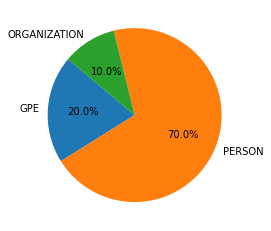

In [77]:
with open('uber_apple.txt') as f:
    article = f.read()
    sentences = sent_tokenize(article)
    token_sentences = [word_tokenize(sent) for sent in sentences]
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
    chunked_sentences = nltk.ne_chunk_sents(pos_sentences)
    chunked_sentences = list(chunked_sentences)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

## ***Comparing NLTK with spaCy NER***

Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as `article`. To minimize execution times, you'll be asked to specify the keyword argument `disable=['tagger', 'parser', 'matcher']` when loading the spaCy model, because you only care about the entity in this exercise.

* Load the `'en_core_web_sm'` model using **`spacy.load()`**. Specify the additional keyword arguments `disable=['tagger', 'parser', 'matcher']`.

* Create a spacy document object by passing article into `nlp()`.

*  Using `ent` as your iterator variable, iterate over the entities of `doc` and print out the labels (`ent.label_`) and text (`ent.text`).

In [83]:
with open('uber_apple.txt') as f:
    article = f.read()

    # Instantiate the English model: nlp
    nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

    # Create a new document: doc
    doc = nlp(article)

    # Print all of the found entities and their labels
    for ent in doc.ents:
        print(ent.label_, ent.text)


ORG Apple
PERSON Travis Kalanick
PERSON Tim Cook
ORG Apple
CARDINAL Millions
LOC Silicon Valley’s
ORG Yahoo, Marissa Mayer
MONEY 186


# **Multilingual NER with polyglot**

* ใช้ระบุ entity ในภาษาอื่นๆ

In [15]:
from polyglot.text import Text, Word
from polyglot.downloader import downloader
downloader.download("embeddings2.es")
downloader.download("ner2.es")

text = """El presidente de la Generalitat de Cataluña, 
          Carles Puigdemont, ha afirmado hoy a la alcaldesa
          de Madrid, Manuela Carmena, que en su etapa de
          alcalde de Girona (de julio de 2011 a enero de 2016)
          hizo una gran promoción de Madrid."""
ptext = Text(text)
ptext.entities

[I-ORG(['Generalitat', 'de']),
 I-LOC(['Generalitat', 'de', 'Cataluña']),
 I-PER(['Carles', 'Puigdemont']),
 I-LOC(['Madrid']),
 I-PER(['Manuela', 'Carmena']),
 I-LOC(['Girona']),
 I-LOC(['Madrid'])]

## ***French NER with polyglot I***

In this exercise and the next, you'll use the **`polyglot`** library to identify French entities. The library functions slightly differs from **`spacy`**, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

You have access to the full article string in `article`. Additionally, the **`Text`** class of polyglot has been imported from **`polyglot.text`**.

* Using the article string in `article`, create a new **`Text`** object called `txt`.

* Iterate over `txt.entities` and print each entity, `ent`.

* Print the `type()` of `ent`. 

In [20]:
# downloader.download('embeddings2.fr')
# downloader.download('ner2.fr')

with open('french.txt') as f:
    article = f.read()

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))


['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


## ***French NER with polyglot II***

Here, you'll complete the work you began in the previous exercise.

Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.


* Use a list comprehension to create a list of tuples called `entities`.

* The output expression of your list comprehension should be a tuple.
  * The first element of each tuple is the entity tag, which you can access using its **`.tag`** attribute.
  * The second element is the full string of the entity text, which you can access using `.join(ent)`.

* Your iterator variable should be `ent`, and you should iterate over all of the entities of the **`polyglot Text`** object, `txt`.
* Print `entities` to see what you've created.

In [28]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


## ***Spanish NER with polyglot***

You'll continue your exploration of **`polyglot`** now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

The **`Text`** object has been created as `txt`, and each entity has been printed.



```
['Lina']
['Castillo']
['Teresa', 'Lozano', 'Long']
['Universidad', 'de', 'Texas']
['Austin']
['Austin', '.']
['Austin', '.', 'Ella']
['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['LIna']
['Castillo']
['colombiano']
['Colombia']
['Estados', 'Unidos']
['Castillo']
['Nation']
['Kenneth', 'Nebenzahl']
['Jr']
['Library']
['Society']
['Humboldt']
['América', 'Latina']
['.', 'García', 'Márquez']
['colombiano']
['Gabriel', 'García', 'Márquez']
['Gabo']
['Fidel', 'Castro']
['Gabo']
['Castro']
['colombianos']
['Gabo']
['colombiano']
['colombiano', 'Belisario', 'Betancur']
['Betancur']
['Fuerzas', 'Armadas', 'Revolucionarias', 'de', 'Colombia']
['FARC']
['Gabo']
['Cuba']
['Betancur']
['Gabo']
['Cuba']
['.', 'Betancur']
['Gabriel', 'García', 'Márquez']
['Gabo']
['San', 'Vicente', 'del', 'Caguán']
['Andrés', 'Patrana']
['FARC']
['Gabo']
['Pastrana']
['Ejército', 'de', 'Liberación', 'Nacional']
['ELN']
['García', 'Márquez']
['Mercedes', 'Barcha']
['ELN']
['La', 'Habana']
['Gabo']
['La', 'Habana']
['Gabo']
['Fidel', 'Castro']
['Gabriel', 'García', 'Márquez']
['Fidel', 'Castro']
['Gabriel', 'García', 'Márquez']
['Carmen', 'Balcells']
['La', 'Habana']
['Estados', 'Unidos']
['Colombia']
['.', 'Gabriel', 'García', 'Márquez']
['Gabo']
['Salman', 'Rushdie']
['Elena', 'Poniatowska']
['Gabo']
['Gabo']
['Gabriel', 'García', 'Márquez']
['García', 'Márquez']
['Macondo']
['colombiana']
['United', 'Fruit', 'Company']
['colombiano']
['Ciénaga']
['Santa']
['Santa', 'Marta']
['García', 'Márquez']
['York']
['Español']
['José', 'Arcadio', 'Segundo']
['García', 'Márquez']
['United', 'Fruit']
['Colombia']
['Macondo']
['Gabo']
['Gabo']
['Ciénaga']
['colombiana']
['José', 'Arcadio', 'Segundo']
['García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['Harry', 'Ransom']
['Harry', 'Ransom', 'Center']
```



Your specific task is to determine how many of the entities contain the words `"Márquez"` or `"Gabo"` - these refer to the same person in different ways!

* Iterate over all of the entities of `txt`, using `ent` as your iterator variable.

* Check whether the entity contains `"Márquez"` or `"Gabo"`. If it does, increment count. *Don't forget to include the accented `á` in `"Márquez"`!*


In [37]:
# downloader.download('embeddings2.es')
# downloader.download('ner2.es')

s = '''Lina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin. Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.


LIna del Castillo


Actualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del n...el tren de medianoche que lleva a miles y miles de cadáveres uno encima del otro como tantos racimos del banano que acabarán tirados al mar. Ningún recuento periodístico podría provocar nuestra imaginación y nuestra memoria como este relato de García Márquez.


Contenido Relacionado


Lea más artículos sobre el archivo de Gabriel García Márquez


Reciba mensualmente las últimas noticias e información del Harry Ransom Center con eNews, nuestro correo electrónico mensual. ¡Suscríbase hoy!'''

txt = Text(s)

# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if ('Márquez' in ent) | ('Gabo' in ent):
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)


4
0.26666666666666666


# **Building word count vectors with scikit-learn**

มีข้อควรระวังต้องทำ train test split ตรงที่ถ้าข้อมูลใน train มีน้อยไป แล้วมีคำใน test ที่ไม่ปรากฎใน train จะเกิด error ได้ ต้องเพิ่มขนาดของ train หรือเอาคำที่มีปัญหาออกไปจาก test

## ***CountVectorizer for text classification***

It's time to begin building your text classifier! The data has been loaded into a DataFrame called `df`. Explore it in the IPython Shell to investigate what columns you can use. The `.head()` method is particularly informative.



```
                                               title                                               text label
0                       You Can Smell Hillary’s Fear  Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1  Watch The Exact Moment Paul Ryan Committed Pol...  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2        Kerry to go to Paris in gesture of sympathy  U.S. Secretary of State John F. Kerry said Mon...  REAL
3  Bernie supporters on Twitter erupt in anger ag...  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE
4   The Battle of New York: Why This Primary Matters  It's primary day in New York and front-runners...  REAL
```



In this exercise, you'll use `pandas` alongside `scikit-learn` to create a sparse text vectorizer you can use to train and test a simple supervised model. To begin, you'll set up a **`CountVectorizer`** and investigate some of its features.

* Create a Series `y` to use for the labels by assigning the **`.label`** attribute of `df` to `y`.

* Using `df["text"]` (features) and `y` (labels), create training and test sets using **`train_test_split()`**. Use a `test_size` of `0.33` and a `random_state` of `53`.

* Create a **`CountVectorizer`** object called `count_vectorizer`. Ensure you specify the keyword argument `stop_words="english"` so that stop words are removed.

* Fit and transform the training data `X_train` using the **`.fit_transform()`** method of your **`CountVectorizer`** object. Do the same with the test data `X_test`, except using the **`.transform()`** method.

* Print the first 10 features of the `count_vectorizer` using its **`.get_feature_names()`** method.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Create a series to store the labels: y
y = df['label']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])



```
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']
```



## ***TfidfVectorizer for text classification***

Similar to the sparse **`CountVectorizer`** created in the previous exercise, you'll work on creating tf-idf vectors for your documents. You'll set up a `TfidfVectorizer` and investigate some of its features.

In this exercise, you'll use `pandas` and `sklearn` along with the same `X_train`, `y_train` and `X_test`, `y_test` DataFrames and Series you created in the last exercise.

* Create a **`TfidfVectorizer`** object called `tfidf_vectorizer`. When doing so, specify the keyword arguments `stop_words="english"` and `max_df=0.7`.

* Fit and transform the training data.
* Transform the test data.
* Print the first 10 features of `tfidf_vectorizer`.
* Print the first 5 vectors of the tfidf training data using slicing on the **`.A`** (or array) attribute of `tfidf_train`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])




```
['00', '000', '001', '008s', '00am', '00pm', '01', '01am', '02', '024'] 
    
    
    [[0.         0.01928563 0.         ... 0.         0.         0.        ]
     [0.         0.         0.         ... 0.         0.         0.        ]
     [0.         0.02895055 0.         ... 0.         0.         0.        ]
     [0.         0.03056734 0.         ... 0.         0.         0.        ]
     [0.         0.         0.         ... 0.         0.         0.        ]]
```
## ***Inspecting the vectors***

To get a better idea of how the vectors work, you'll investigate them by converting them into `pandas` DataFrames.

Here, you'll use the same data structures you created in the previous two exercises (`count_train`, `count_vectorizer`, `tfidf_train`, `tfidf_vectorizer`) as well as `pandas`, which is imported as `pd`.

* Create the DataFrames `count_df` and `tfidf_df` by using **`pd.DataFrame()`** and specifying the values as the first argument and the columns (or features) as the second argument.
  * The values can be accessed by using the **`.A`** attribute of, respectively, `count_train` and `tfidf_train`.

  * The columns can be accessed using the **`.get_feature_names()`** methods of `count_vectorizer` and `tfidf_vectorizer`.

* Print the head of each DataFrame to investigate their structure. 

* Test if the column names are the same for each DataFrame by creating a new object called difference to see the difference between the columns that `count_df` has from `tfidf_df`. Columns can be accessed using the **`.columns`** attribute of a DataFrame. Subtract the set of `tfidf_df.columns` from the set of `count_df.columns`.

* Test if the two DataFrames are equivalent by using the **`.equals()`** method on `count_df` with `tfidf_df` as the argument.


In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(data=count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(data=tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))




```
       000  00am  0600  10  100  ...  yuan  zawahiri  zeitung  zero  zerohedge
    0    0     0     0   0    0  ...     0         0        0     1          0
    1    0     0     0   3    0  ...     0         0        0     0          0
    2    0     0     0   0    0  ...     0         0        0     0          0
    3    0     0     0   0    0  ...     0         0        0     0          0
    4    0     0     0   0    0  ...     0         0        0     0          0
    
    [5 rows x 5111 columns]
       000  00am  0600     10  100  ...  yuan  zawahiri  zeitung   zero  zerohedge
    0  0.0   0.0   0.0  0.000  0.0  ...   0.0       0.0      0.0  0.034        0.0
    1  0.0   0.0   0.0  0.106  0.0  ...   0.0       0.0      0.0  0.000        0.0
    2  0.0   0.0   0.0  0.000  0.0  ...   0.0       0.0      0.0  0.000        0.0
    3  0.0   0.0   0.0  0.000  0.0  ...   0.0       0.0      0.0  0.000        0.0
    4  0.0   0.0   0.0  0.000  0.0  ...   0.0       0.0      0.0  0.000        0.0
    
    [5 rows x 5111 columns]
    set()
    False
```

# **Training and testing a classification model with scikit-learn**

## ***Training and testing the "fake news" model with CountVectorizer***

Now it's your turn to train the "fake news" model using the features you identified and extracted. In this first exercise you'll train and test a Naive Bayes model using the **`CountVectorizer`** data.

The training and test sets have been created, and `count_vectorizer`, `count_train`, and `count_test` have been computed.

* Instantiate a **`MultinomialNB`** classifier called `nb_classifier`.

* Fit the classifier to the training data.

* Compute the predicted tags for the test data.

* Calculate and print the accuracy score of the classifier.

* Compute the confusion matrix. To make it easier to read, specify the keyword argument `labels=['FAKE', 'REAL']`.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)



```
    0.893352462936394
    [[ 865  143]
     [  80 1003]]
```

## ***Training and testing the "fake news" model with TfidfVectorizer***

Now that you have evaluated the model using the **`CountVectorizer`**, you'll do the same using the **`TfidfVectorizer`** with a Naive Bayes model.

The training and test sets have been created, and `tfidf_vectorizer`, `tfidf_train`, and `tfidf_test` have been computed. Additionally, **`MultinomialNB`** and **`metrics`** have been imported from, respectively, **`sklearn.naive_bayes`** and **`sklearn`**.

* Instantiate a **`MultinomialNB`** classifier called `nb_classifier`.
* Fit the classifier to the training data.
* Compute the predicted tags for the test data.
* Calculate and print the accuracy score of the classifier.
* Compute the confusion matrix. As in the previous exercise, specify the keyword argument `labels=['FAKE', 'REAL']` so that the resulting confusion matrix is easier to read.



In [ ]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)



```
    0.8565279770444764
    [[ 739  269]
     [  31 1052]]
```
# **Simple NLP, complex problems**

## ***Improving your model***

Your job in this exercise is to test a few different alpha levels using the **`Tfidf`** vectors to determine if there is a better performing combination.

The training and test sets have been created, and `tfidf_vectorizer`, `tfidf_train`, and `tfidf_test` have been computed.

* Create a list of alphas to try using **`np.arange()`**. Values should range from `0` to `1` with steps of `0.1`.

* Create a function `train_and_predict()` that takes in one argument: `alpha`. The function should:
  * Instantiate a **`MultinomialNB`** classifier with `alpha=alpha`.
  * Fit it to the training data.
  * Compute predictions on the test data.
  * Compute and return the accuracy score.

* Using a `for` loop, print the `alpha`, `score` and a newline in between. Use your `train_and_predict()` function to compute the score. Does the score change along with the alpha? What is the best alpha?


In [ ]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()




```
    Alpha:  0.0
    Score:  0.8813964610234337
    
    Alpha:  0.1
    Score:  0.8976566236250598
    
    Alpha:  0.2
    Score:  0.8938307030129125
    
    Alpha:  0.30000000000000004
    Score:  0.8900047824007652
    
    Alpha:  0.4
    Score:  0.8857006217120995
    
    Alpha:  0.5
    Score:  0.8842659014825442
    
    Alpha:  0.6000000000000001
    Score:  0.874701099952176
    
    Alpha:  0.7000000000000001
    Score:  0.8703969392635102
    
    Alpha:  0.8
    Score:  0.8660927785748446
    
    Alpha:  0.9
    Score:  0.8589191774270684
```

## ***Inspecting your model***

Now that you have built a "fake news" classifier, you'll investigate what it has learned. You can map the important vector weights back to actual words using some simple inspection techniques.

You have your well performing tfidf Naive Bayes classifier available as `nb_classifier`, and the vectors as `tfidf_vectorizer`.

* Save the class labels as `class_labels` by accessing the **`.classes_`** attribute of `nb_classifier`.

* Extract the features using the **`.get_feature_names()`** method of `tfidf_vectorizer`.

* Create a zipped array of the classifier coefficients with the feature names and sort them by the coefficients. To do this, first use **`zip()`** with the arguments `nb_classifier.coef_[0]` and `feature_names`. Then, use **`sorted()`** on this.

* Print the top 20 weighted features for the first label of `class_labels` and print the bottom 20 weighted features for the second label of `class_labels`.

In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])